In [1]:
import matplotlib.pyplot as plt
import numpy as np
import texpy as mz
from src import *

$\frac{\rho_{c,xx}}{W_G}
\int_{-\infty}^{+\infty} \frac{dk}{2\pi}
\frac{\sin(kW_G/2)\omega(k)/k^2}{\omega(k)\coth(kW/2)+k\tan^2(\theta_{VH})\coth[\omega(k)W/2]}$

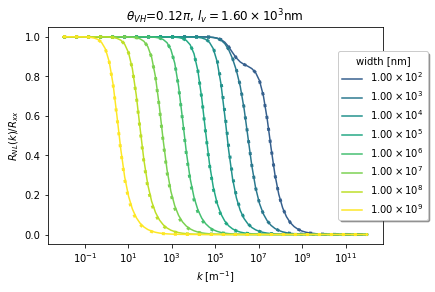

In [63]:
number_of_graphs=8
cmap=plt.get_cmap('viridis')
colors=cmap(np.linspace(.3,1,number_of_graphs))

widths=np.logspace(-7,-0,number_of_graphs,base=10)
#mu=np.linspace(delta,2*delta,number_of_graphs)

lv=1.6e-6
tan=np.tan(np.pi/2-np.pi/30)
tan=np.tan(np.pi/8)
#tan=0.3
theta=np.arctan(tan)
for i in range(number_of_graphs):
    k= np.logspace(-2,12,80,base=10,dtype=np.double)
    R=[R_NLk(k,widths[i],lv,tan=tan) for k in k]
    plt.plot(k,R,color=colors[i],label=str(mz.ns(widths[i]*1e9)))
    plt.plot(k,R_NLk0(k,widths[i],lv,tan=tan),linestyle=(0,(1,3)),linewidth=3,color=colors[i])



title_theta='$\\theta_{VH}$='+str(theta/np.pi)[:4]+'$\pi$'
title_lv='$l_v=$'+ str(mz.ns(lv*1e9))+'nm'

title=title_theta + ', ' + title_lv



#plt.yscale('log')
#plt.ylim(1e-6,1.2)
#plt.style.use('dark_background')
plt.xscale('log')
plt.xlabel('$k$ [m$^{-1}$]')
plt.ylabel('$R_{NL}(k)/R_{xx}$')
plt.title(title)
plt.legend(loc='right', bbox_to_anchor=(1.15,0.5), shadow=True,title='width [nm]')
#plt.savefig('black_fourier.png',format='png',dpi=200)
plt.show()
#plt.xlim(0,500)

$R_{NL}(x)\approx
\frac{W \rho_{c,xx}e^{-|x|/L_v}}{2L_v[1+\cotg^2(\Theta_{VH})]}-
\frac{2\rho_{c,xx}}{\pi [1+\tan^2(\Theta_{VH})]}\ln \bigg|\tanh \Big(\frac{\pi x}{2W}\Big)\bigg|$


$L_v^2=l_v^2+\frac{W^2}{12}+\frac{l_vW}2\tan^2(\Theta_{VH})\coth\Big(\frac W{2l_v}\Big)
$

In [64]:
#x=np.array([(1/2+2**x)*np.pi for x in range(10)])
width=1.7e-6
limit=1e4/width

x=(np.arange(70)*600+1/2)*np.pi/limit

args=(width,lv,tan)
Y=R_NLx(x,args,limit=limit)[:,0]*width

/Users/francesco/Github/Masters_thesis/src/fourier.py:22: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  RNL=np.array([quad(R_NLk,0,limit,args=args,weight='cos',wvar=x) for x in x])/np.pi


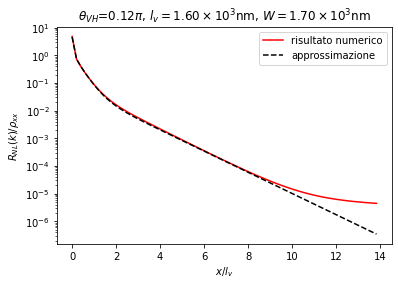

In [65]:

plt.plot(x/lv,Y,color='red',label='risultato numerico')
    

yappr=R_NL0(x,*args) #MA STO /2 NON CI DOVREBBE STARE...
plt.plot(x/lv,yappr,color='black',linestyle='--',label='approssimazione')

#plt.plot(x/lv,np.abs(Y*width-yappr),color='gray',linestyle='--')


plt.yscale('log')
plt.xlabel('$x/l_v$')
plt.ylabel('$R_{NL}(k)/\\rho_{xx}$')

title_width='$W=$'+str(mz.ns(width*1e9))+'nm'
title=title_theta + ', ' + title_lv + ', ' + title_width

plt.title(title)
#plt.legend(loc='right', bbox_to_anchor=(1.15,0.5), shadow=True,title='width [nm]')
#plt.xlim(0,1)
#plt.ylim(1e-3,1)
plt.legend()
plt.savefig('R_NLx.png')

/Users/francesco/Github/Masters_thesis/src/approximations.py:14: RuntimeWarning: divide by zero encountered in power
  c1=np.exp(-np.abs(x)/L)/(2*L*(1+tan**(-2)))*width #approximation for x far from 0


Text(0, 0.5, '$R_{NL}$[k$\\Omega$]')

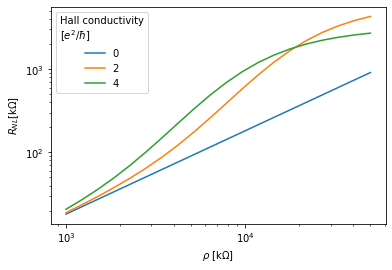

In [137]:


for i in [0,2,4]:
    hall_conductivity=i*e**2/(2*np.pi*hbar)
    x=2.3e-6
    min,max=1e3,5e4
    rhoxx=np.logspace(np.log10(min),np.log10(max),20)
    tan=rhoxx*hall_conductivity
    L=Lv(width,lv,tan)
    #c1=np.exp(-np.abs(x)/L)/(2*L*(1+tan**(-2)))*width*rhoxx #approximation for x far from 0
    #c2= -2*rhoxx*np.log(np.abs(np.tanh(np.pi*x/(2*width))))/(np.pi*(1+tan**2))   #approximation for x close to zero
    #plt.plot(rhoxx,np.exp(-np.abs(x)/L)/(2*L*(1+tan**(-2)))*rhoxx*width)
    plt.plot(rhoxx,R_NL0(x,width,lv,tan)*rhoxx,label=i)
    
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Hall conductivity\n[$e^2/\hbar$]')
plt.xlabel('$\\rho$ [k$\Omega$]')
plt.ylabel('$R_{NL}$[k$\Omega$]')
#plt.ylim(10,1e3)
#plt.xlim(1e3,1e5)

#plt.plot([1e3,1e4],[2e1,1e3])
#plt.plot([min,max],width/(2*lv*hall_conductivity)*np.array([1,1]),color='black',linestyle='--')
